In [1]:
%pip install sklearn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches 
import pylab as pl
import numpy as np 
import csv
import pandas as pd
datos = pd.read_csv('H1N1_Flu_Vaccines.csv', on_bad_lines='skip', sep= ';')
datos.head(100)

datos.opinion_h1n1_risk=datos.opinion_h1n1_risk.fillna(0)
datos.opinion_h1n1_sick_from_vacc=datos.opinion_h1n1_sick_from_vacc.fillna(0)
datos.opinion_seas_vacc_effective=datos.opinion_seas_vacc_effective.fillna(0)
datos.opinion_h1n1_vacc_effective=datos.opinion_h1n1_vacc_effective.fillna(0)
datos.opinion_h1n1_risk=datos.opinion_h1n1_risk.astype(int)
datos.opinion_h1n1_sick_from_vacc=datos.opinion_h1n1_sick_from_vacc.astype(int)
datos.opinion_seas_vacc_effective=datos.opinion_seas_vacc_effective.astype(int)
datos.opinion_h1n1_vacc_effective=datos.opinion_h1n1_vacc_effective.astype(int)

X = datos[['opinion_h1n1_vacc_effective','opinion_h1n1_risk']].values
y = datos['h1n1_vaccine'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_neighbors = 100
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))



Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.80


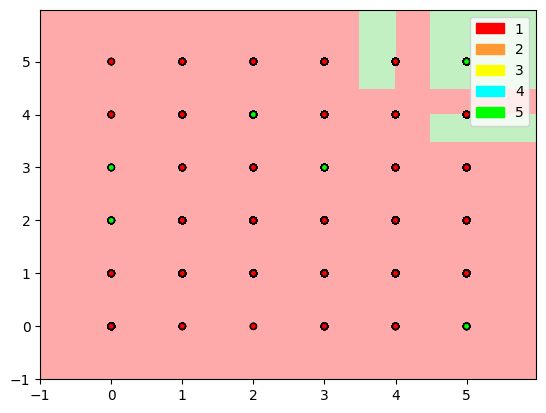

In [8]:
h = .02  

# Se crean los colores de los mapas
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# creamos una instancia de Neighbors Classifier y ajustamos los datos.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Trazar el límite de decisión. Para eso, asignaremos un color a cada
# Puntos en la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Se aplican los colores en los resultados graficos.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# se plotean todos los puntos de entrenamiento.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

plt.show()

([<matplotlib.axis.XTick at 0x22e87d424d0>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

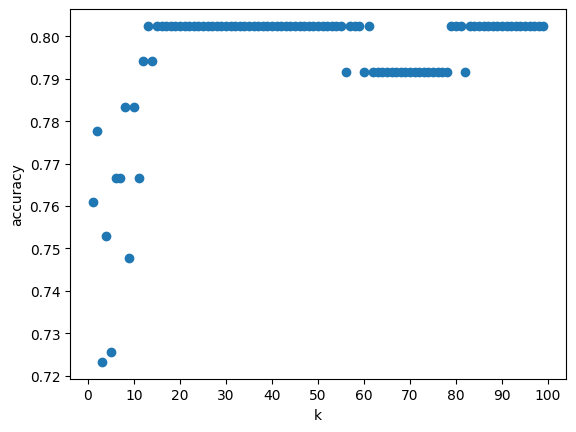

In [9]:
k_range = range(1, 100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])

In [1]:
%pip install plotnine

     ---------------------------------------- 1.2/1.2 MB 15.7 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 65.2 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB ? eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.0 MB/s eta 0:00:00
     ---------------------------------------- 338.8/338.8 kB ? eta 0:00:00
     -------------------------------------- 111.8/111.8 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:

%precision %.7g
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [8]:


#Cargar data del dataset.
datos = pd.read_csv('All_Diets.csv', on_bad_lines='skip', sep= ';')

#Limpiar datos Nan, transformandolos en 0.
datos.Protein=datos.Protein.fillna(0)
#datos.Protein=datos.Protein.astype(int)
datos.Carbs = datos.Carbs.fillna(0)
#datos.Carbs = datos.Carbs.astype(int)
datos.Fat = datos.Fat.fillna(0)
datos.Fat = datos.Fat.astype(int)

#Columnas predictoras.
predictors = ['Protein','Carbs']
X = datos[predictors]

#Columna que se buscara predecir.
y = datos['Fat']

#Division de la data para entrenamiento y testeo con la funcion train_test_split con tamano 0.2 para testear.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train['Protein'])
print(X_test['Protein'])
#Definir numero de vecinos para definir un cluster.
n_neighbors = 5

#Creacion del modelo KNN con KNeighborsClassifier.
knn = KNeighborsClassifier()

#Estandarizar la data para poder ser utilizado en el modelo.
z = StandardScaler()

#
z.fit(X_train)

Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

#Ingresar datos de entrenamiento al modelo para que este aprenda.
knn.fit(Xz_train, y_train)


#Funcion para poder crear la grafica y asi visualizar el resultado del modelo KNN. 
def plotKNN(X, y, title, n_neighbors, model):
  #Codigo adaptado desde la pagina: https://pythonspot.com/k-nearest-neighbors/
  
  #step size i the mesh
  h = .5 
  
  #Create color maps
  cmap_light = ListedColormap(['orange','cyan','cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange','c','darkblue'])
  
  #calculate min, max and Limits
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  #predict class using data and kNN classifier
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  #Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

  #Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title('Classification Plot (k = %i)' % (n_neighbors))
  plt.show()

#Iniciar la funcion plotKNN.
plotKNN(X = Xz_train, y = y_train, title = 'KNN', n_neighbors = n_neighbors, model = knn)


print('\nExactitud del modelo KNN para conjunto de entrenamiento: {:.2f}'
     .format(knn.score(Xz_train, y_train)))
print('Exactitud del modelo KNN para conjunto de test: {:.2f}'
     .format(knn.score(Xz_test, y_test)))

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xz_train, y_train)
    scores.append(knn.score(Xz_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25])

print(len(Xz_train))
print(len(Xz_test))

AttributeError: 'DataFrame' object has no attribute 'Protein'